In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, accuracy_score, roc_curve,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# !pip install opendatasets
# import opendatasets as od
# od.download("https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset/.csv")

In [6]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.Gender.value_counts(dropna=False)


,count
Gender,
Male,489
Female,112
NaN,13


<ipython-input-171-4ff52469cdea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="rocket")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


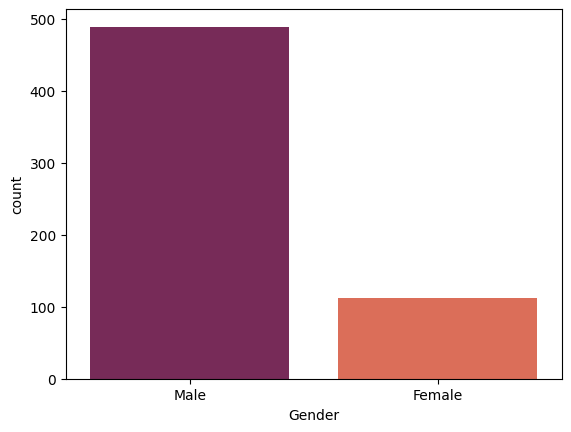

In [ ]:
sns.countplot(x="Gender", data=df, palette="rocket")
plt.show()

In [ ]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


In [ ]:
df.Married.value_counts(dropna=False)

,count
Married,
Yes,398
No,213
NaN,3


<ipython-input-174-7611adda04cc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=df, palette="mako")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


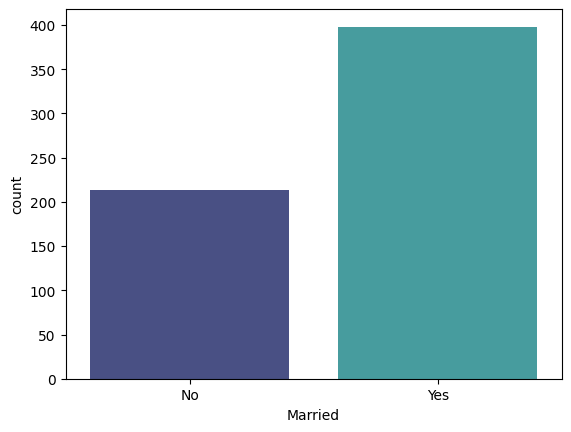

In [ ]:
sns.countplot(x="Married", data=df, palette="mako")
plt.show()

In [ ]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


In [ ]:
df.Education.value_counts(dropna=False)

,count
Education,
Graduate,480
Not Graduate,134


<ipython-input-177-3bcc7ebf2a94>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="mako")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


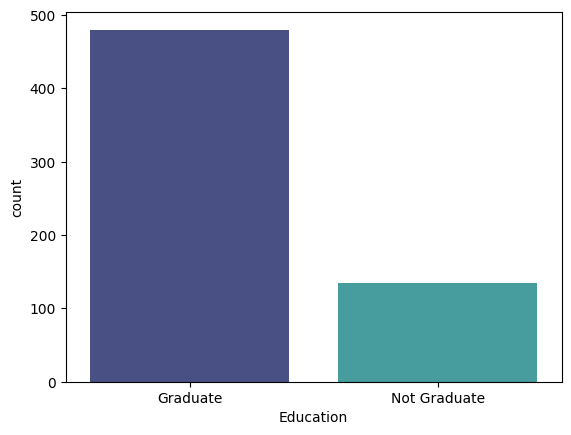

In [ ]:
sns.countplot(x="Education", data=df, palette="mako")
plt.show()

In [ ]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of Graduates: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of NotGraduates: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of Graduates: 78.18%
Percentage of NotGraduates: 21.82%
Missing values percentage: 0.00%


In [ ]:
df.Self_Employed.value_counts(dropna=False)

,count
Self_Employed,
No,500
Yes,82
NaN,32


<ipython-input-180-d78aef66b260>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="magma")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


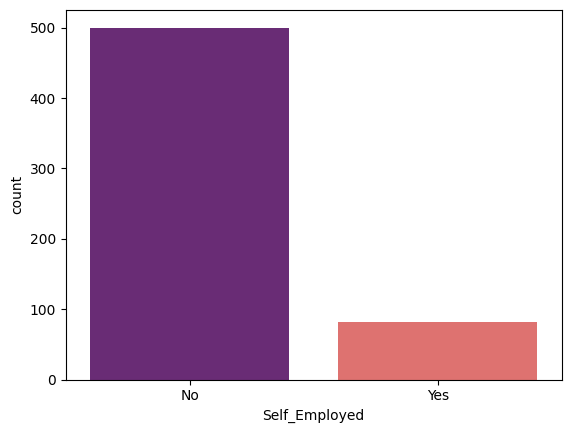

In [ ]:
sns.countplot(x="Self_Employed", data=df, palette="magma")
plt.show()

In [ ]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


In [ ]:
df.Credit_History.value_counts(dropna=False)

,count
Credit_History,
1.0,475
0.0,89
NaN,50


<ipython-input-183-3566c6337a91>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=df, palette="Spectral")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


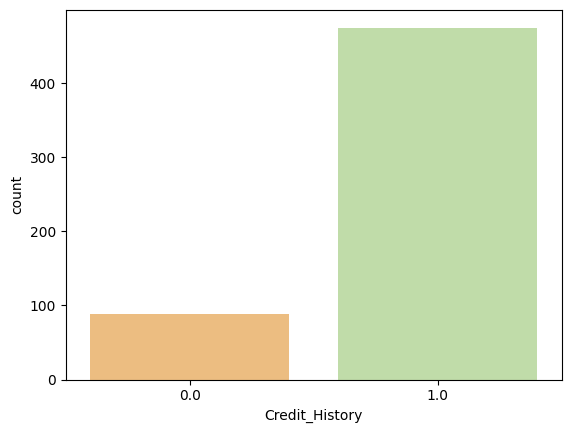

In [ ]:
sns.countplot(x="Credit_History", data=df, palette="Spectral")
plt.show()

In [ ]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


In [ ]:
df.Property_Area.value_counts(dropna=False)

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


<ipython-input-186-9d80339f50db>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=df, palette="mako")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 li

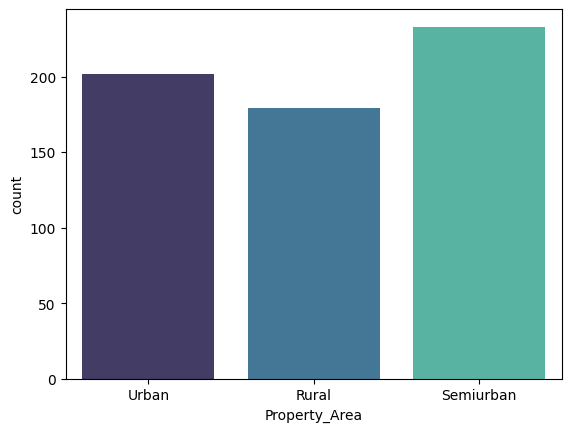

In [ ]:
sns.countplot(x="Property_Area", data=df, palette="mako")
plt.show()

In [ ]:
countUrban = len(df[df.Property_Area == 'Urban'])
countNotRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNan = len(df[df.Property_Area.isnull()])

print("Percentage of Urban Applicants: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural applicant: {:.2f}%".format((countNotRural / (len(df.Property_Area))*100)))
print("Percentage of Semi urban applicant: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban Applicants: 32.90%
Percentage of Rural applicant: 29.15%
Percentage of Semi urban applicant: 37.95%
Missing values percentage: 8.14%


In [ ]:
df.Loan_Status.value_counts(dropna=False)

,count
Loan_Status,
Y,422
N,192


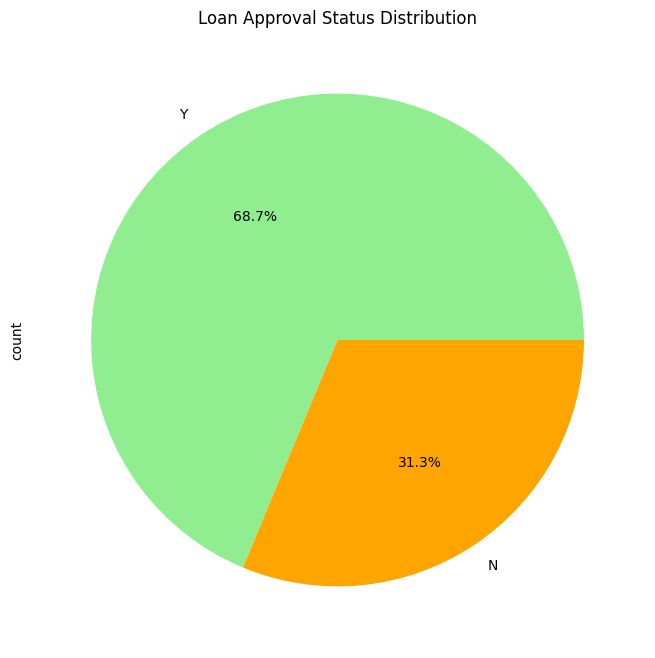

In [ ]:
plt.figure(figsize=(8, 8))
df['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen','orange'])
plt.title('Loan Approval Status Distribution')
plt.show()


In [ ]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


In [ ]:
df.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<ipython-input-192-376f18dcb289>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x=null_counts.index, y=null_counts.values, palette="Blues_d")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When gro

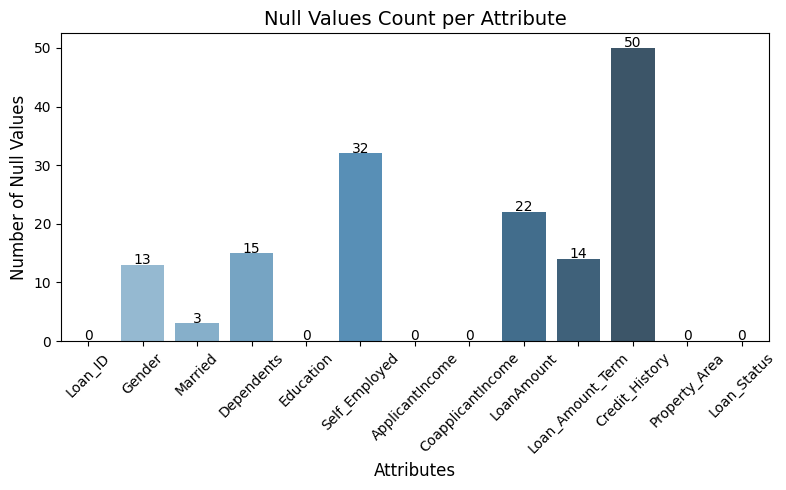

In [ ]:
# Count of null values for each attribute
null_counts = df.isnull().sum()

# Set up the plot
plt.figure(figsize=(8, 5))
barplot=sns.barplot(x=null_counts.index, y=null_counts.values, palette="Blues_d")

for i, value in enumerate(null_counts.values):
    barplot.text(i, value + 0.1, str(value), ha='center', fontsize=10)

# Add labels and title
plt.xlabel('Attributes', fontsize=12)
plt.ylabel('Number of Null Values', fontsize=12)
plt.title('Null Values Count per Attribute', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate attribute names if necessary
plt.tight_layout()
plt.show()


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


<ipython-input-193-0ad3e736eae1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
<ipython-input-193-0ad3e736eae1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
df.isnull().sum()


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<ipython-input-195-b985ce8ecdd9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="Blues_d")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

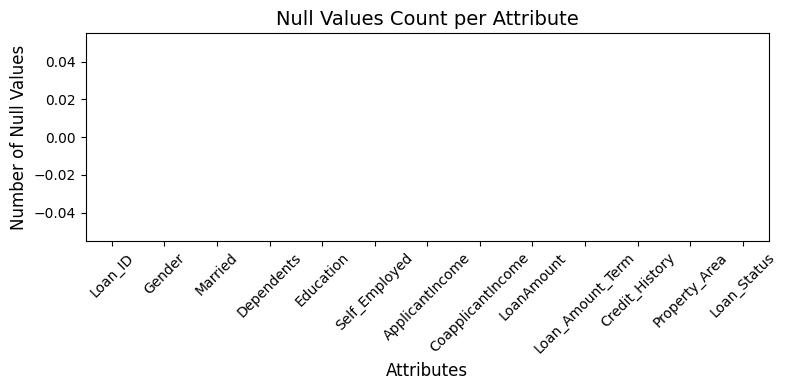

In [ ]:
# Count of null values for each attribute
null_counts = df.isnull().sum()

# Set up the plot
plt.figure(figsize=(8, 4))
sns.barplot(x=null_counts.index, y=null_counts.values, palette="Blues_d")

# Add labels and title
plt.xlabel('Attributes', fontsize=12)
plt.ylabel('Number of Null Values', fontsize=12)
plt.title('Null Values Count per Attribute', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate attribute names if necessary
plt.tight_layout()
plt.show()


In [ ]:
df.duplicated().sum()

0

In [17]:
def bar_chart(col):
    Approved = df[df["Loan_Status"]=="Y"][col].value_counts()
    Disapproved = df[df["Loan_Status"]=="N"][col].value_counts()

    df1 = pd.DataFrame([Approved, Disapproved])
    df1.index = ["Approved", "Disapproved"]
    df1.plot(kind="bar")
    sns.set_palette("pastel")
    plt.title(f'Loan Approval Status based on {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

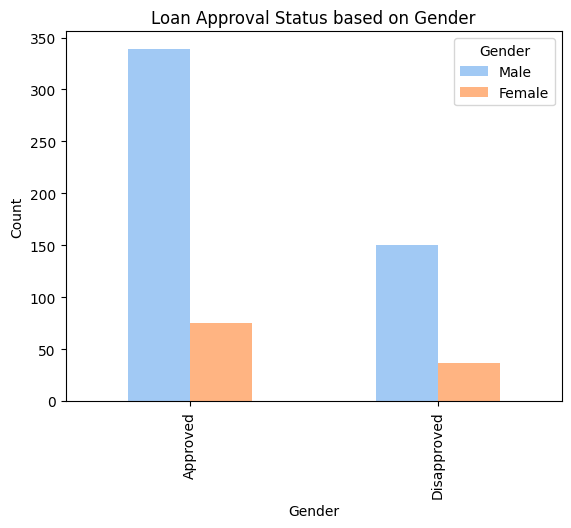

In [19]:
bar_chart("Gender")

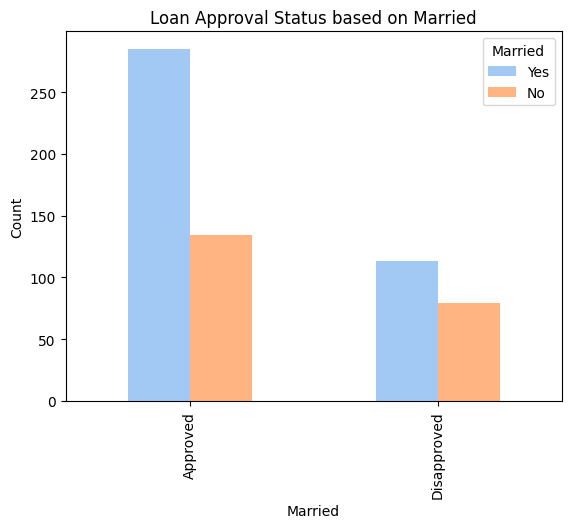

In [20]:
bar_chart("Married")

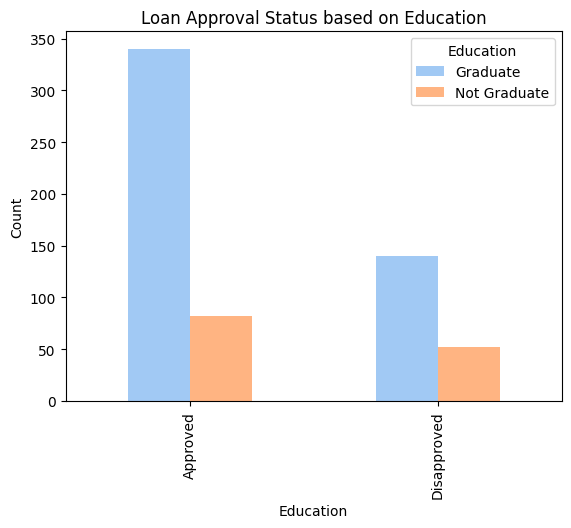

In [21]:
bar_chart("Education")

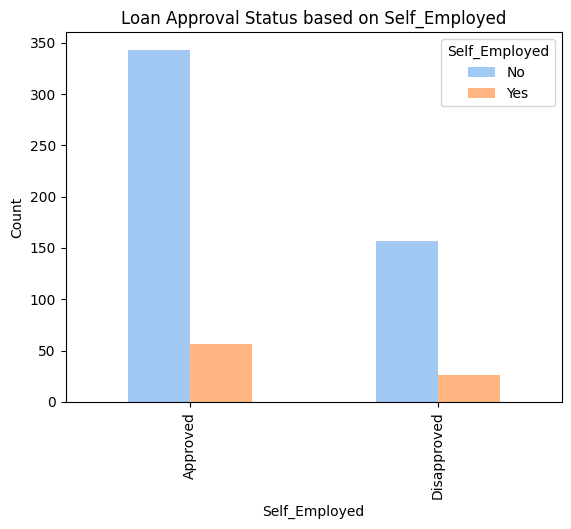

In [22]:
bar_chart("Self_Employed")

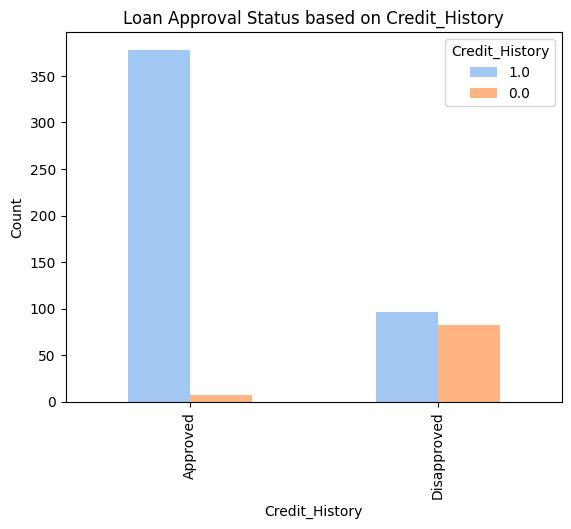

In [23]:
bar_chart("Credit_History")

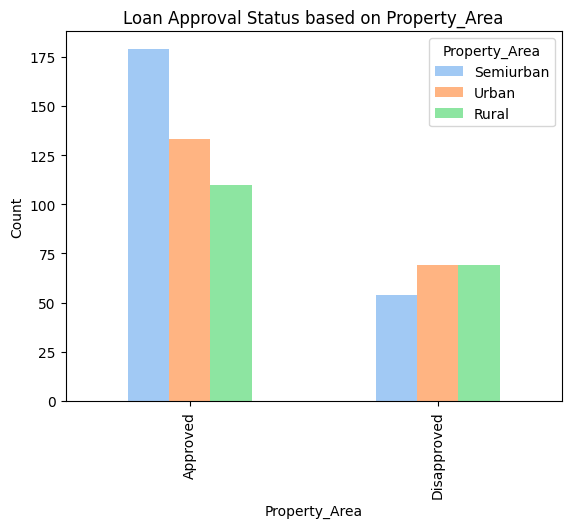

In [24]:
bar_chart("Property_Area")

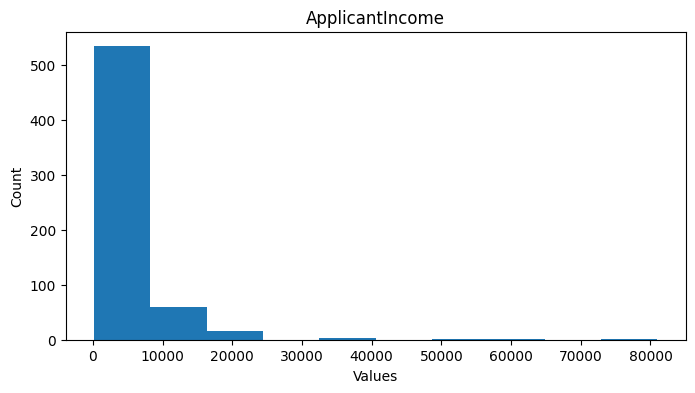

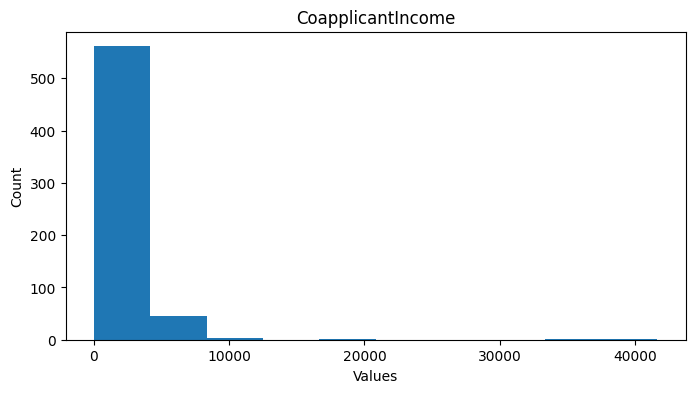

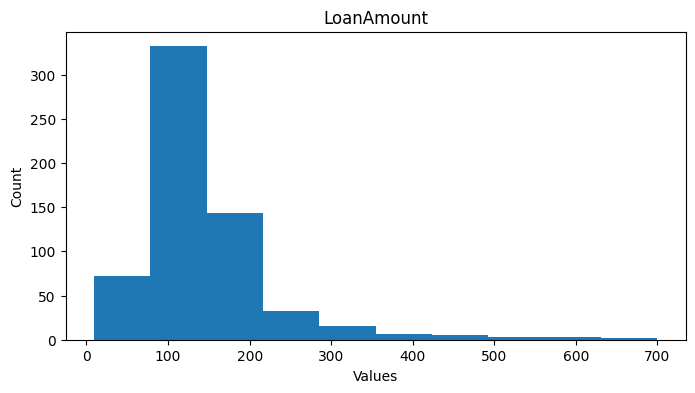

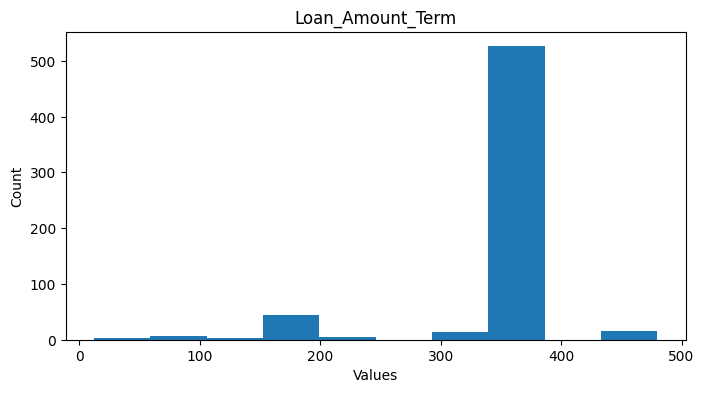

In [ ]:
num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for column in num:
    plt.figure(figsize=(8,4))
    plt.hist(df[column])
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.show()

In [ ]:
df.shape

(614, 13)

In [ ]:
df = df.drop(['Loan_ID'], axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
df = pd.get_dummies(df)
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)
df=df.astype(int)
df.head()
print(df.head())
df.shape

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                  0         146               360   
1             4583               1508         128               360   
2             3000                  0          66               360   
3             2583               2358         120               360   
4             6000                  0         141               360   

   Credit_History  Gender  Married  Dependents_0  Dependents_1  Dependents_2  \
0               1       1        0             1             0             0   
1               1       1        1             0             1             0   
2               1       1        1             1             0             0   
3               1       1        1             1             0             0   
4               1       1        0             1             0             0   

   Dependents_3+  Education  Self_Employed  Property_Area_Rural  \
0              0         

(614, 17)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

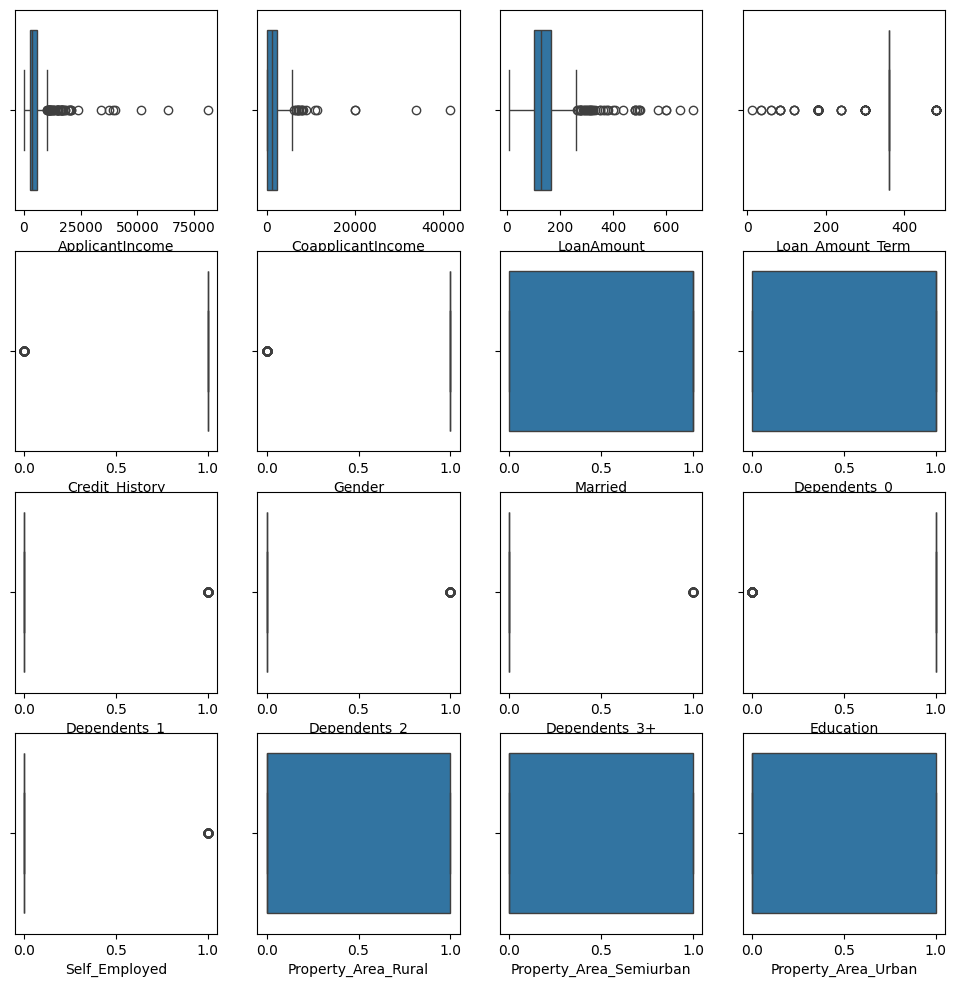

In [ ]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married','Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+','Education','Self_Employed', 'Property_Area_Rural','Property_Area_Semiurban', 'Property_Area_Urban']):
  plt.subplot(4,4,i+1)
  sns.boxplot(x=col,data=df)
plt.show()

In [ ]:
df.shape

(614, 17)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns = [ 'ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area_Semiurban','Property_Area_Urban','Loan_Status','Dependents_0','Dependents_1','Dependents_2','Dependents_3+','Property_Area_Rural']
ordinal_columns = ['Gender', 'Married','Education','Self_Employed']
columns_to_scale = numerical_columns + ordinal_columns

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Verify the scaling
print(df[columns_to_scale].head())
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
aaf=df[~((df < (Q1 - 1.5* IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(aaf.head())
print(aaf.shape)
df=aaf
ddf=df['Loan_Status']

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.070489           0.000000    0.198263           0.74359   
1         0.054830           0.036192    0.172214           0.74359   
2         0.035250           0.000000    0.082489           0.74359   
3         0.030093           0.056592    0.160637           0.74359   
4         0.072356           0.000000    0.191027           0.74359   

   Credit_History  Property_Area_Semiurban  Property_Area_Urban  Loan_Status  \
0             1.0                      0.0                  1.0          1.0   
1             1.0                      0.0                  0.0          0.0   
2             1.0                      0.0                  1.0          1.0   
3             1.0                      0.0                  1.0          1.0   
4             1.0                      0.0                  1.0          1.0   

   Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
0           1.0           0.0 

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

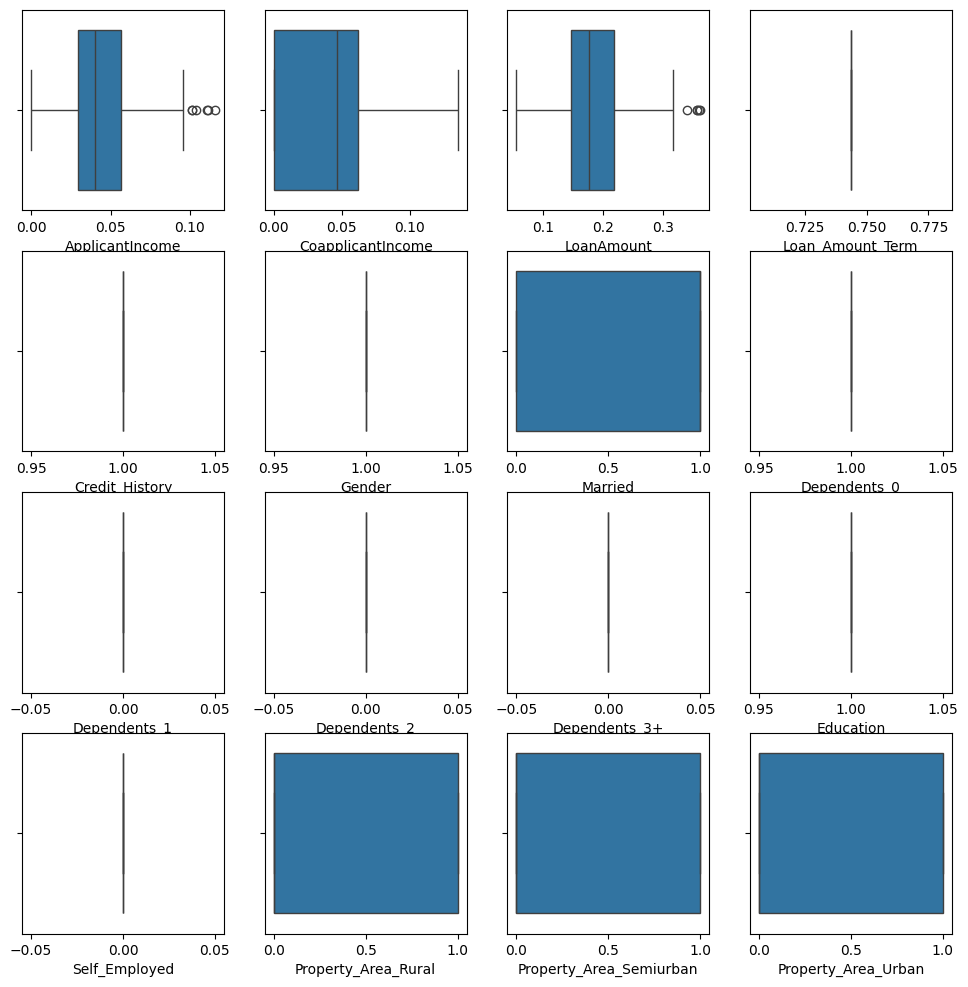

In [ ]:
plt.figure(figsize=(12,12))
for i,col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married','Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+','Education','Self_Employed', 'Property_Area_Rural','Property_Area_Semiurban', 'Property_Area_Urban']):
  plt.subplot(4,4,i+1)
  sns.boxplot(x=col,data=df)
plt.show()

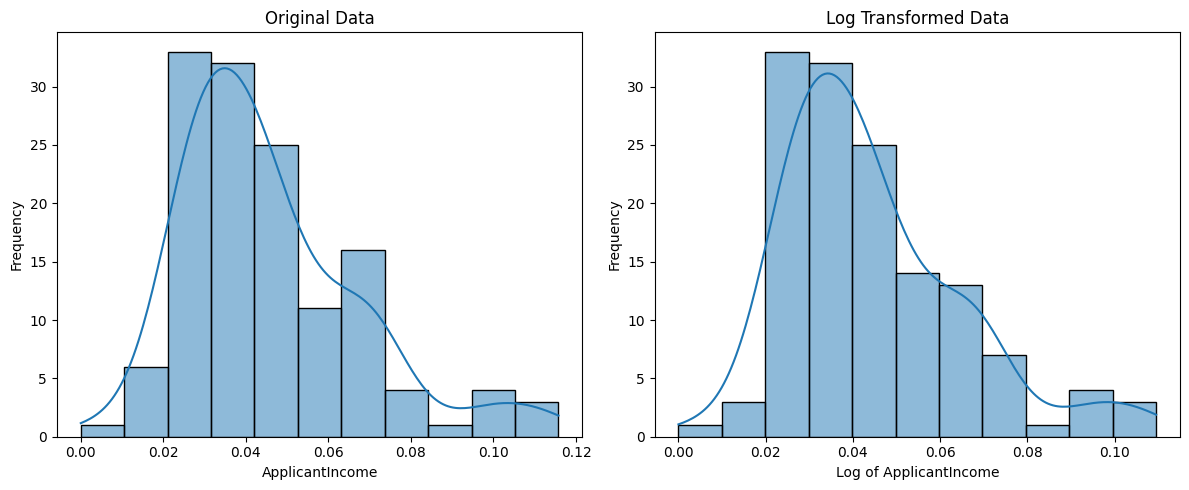

In [ ]:
column_to_transform = 'ApplicantIncome'

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the original data
sns.histplot(df['ApplicantIncome'], kde=True, ax=axes[0])
axes[0].set_title('Original Data')
axes[0].set_xlabel(column_to_transform)
axes[0].set_ylabel('Frequency')

# Apply log transformation (log(1 + x) to handle zero values)
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])

# Plot the log-transformed data
sns.histplot(df['ApplicantIncome'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed Data')
axes[1].set_xlabel('Log of ' + column_to_transform)
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


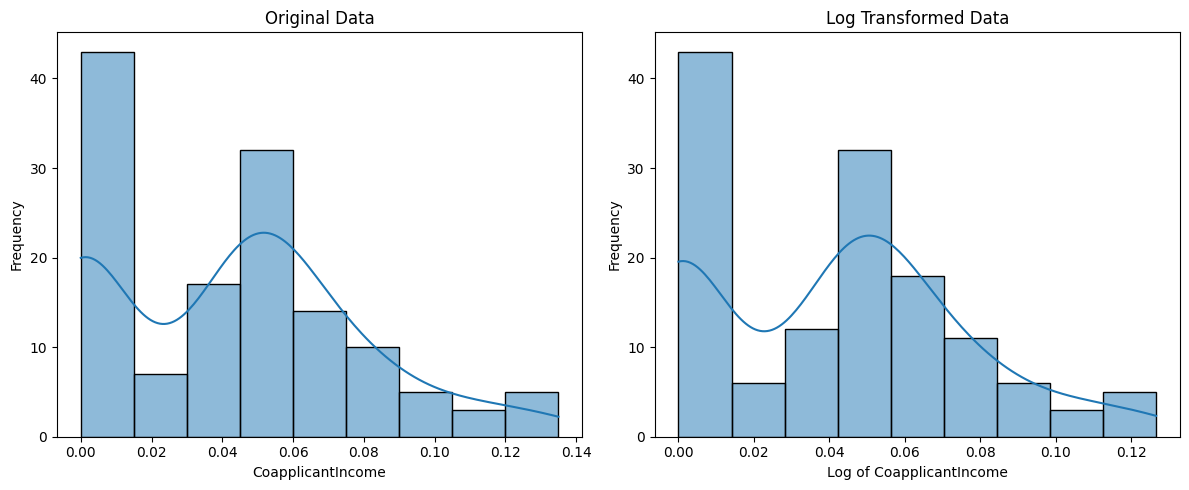

In [ ]:
column_to_transform = 'CoapplicantIncome'

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the original data
sns.histplot(df['CoapplicantIncome'], kde=True, ax=axes[0])
axes[0].set_title('Original Data')
axes[0].set_xlabel(column_to_transform)
axes[0].set_ylabel('Frequency')

# Apply log transformation (log(1 + x) to handle zero or negative values)
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

# Plot the log-transformed data
sns.histplot(df['CoapplicantIncome'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed Data')
axes[1].set_xlabel('Log of ' + column_to_transform)
axes[1].set_ylabel('Frequency')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


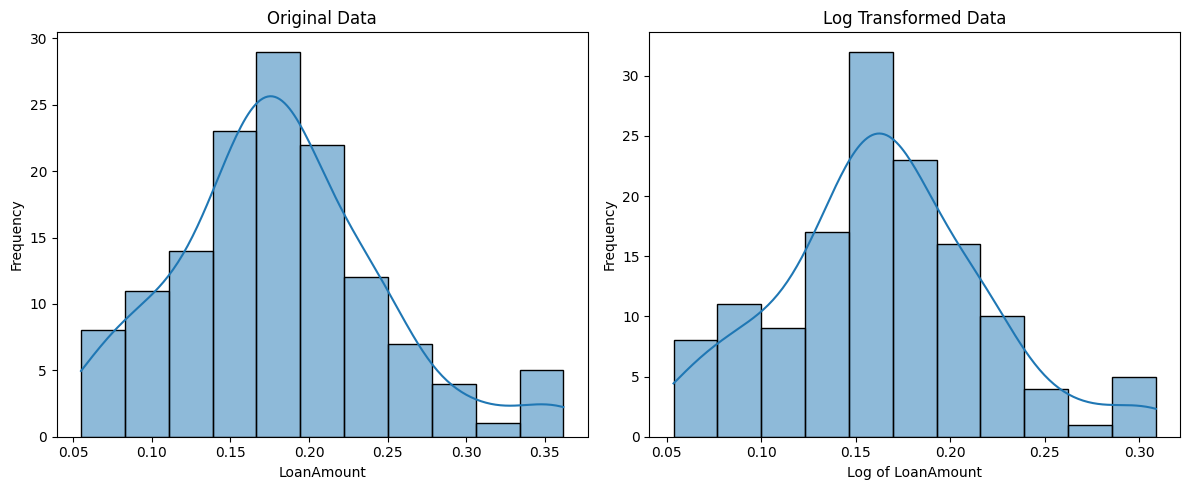

In [ ]:
column_to_transform = 'LoanAmount'

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the original data
sns.histplot(df['LoanAmount'], kde=True, ax=axes[0])
axes[0].set_title('Original Data')
axes[0].set_xlabel(column_to_transform)
axes[0].set_ylabel('Frequency')

# Apply log transformation (log(1 + x) to handle zero or negative values)
df['LoanAmount'] = np.log1p(df['LoanAmount'])

# Plot the log-transformed data
sns.histplot(df['LoanAmount'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed Data')
axes[1].set_xlabel('Log of ' + column_to_transform)
axes[1].set_ylabel('Frequency')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
print(df.head())

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0          0.068115           0.000000    0.180873           0.74359   
4          0.069858           0.000000    0.174816           0.74359   
13         0.020845           0.065937    0.141459           0.74359   
15         0.057674           0.000000    0.155184           0.74359   
19         0.029853           0.080657    0.142715           0.74359   

    Credit_History  Gender  Married  Dependents_0  Dependents_1  Dependents_2  \
0              1.0     1.0      0.0           1.0           0.0           0.0   
4              1.0     1.0      0.0           1.0           0.0           0.0   
13             1.0     1.0      0.0           1.0           0.0           0.0   
15             1.0     1.0      0.0           1.0           0.0           0.0   
19             1.0     1.0      1.0           1.0           0.0           0.0   

    Dependents_3+  Education  Self_Employed  Property_Area_Rural  \
0           

<Axes: title={'center': 'Correlation of variables'}>

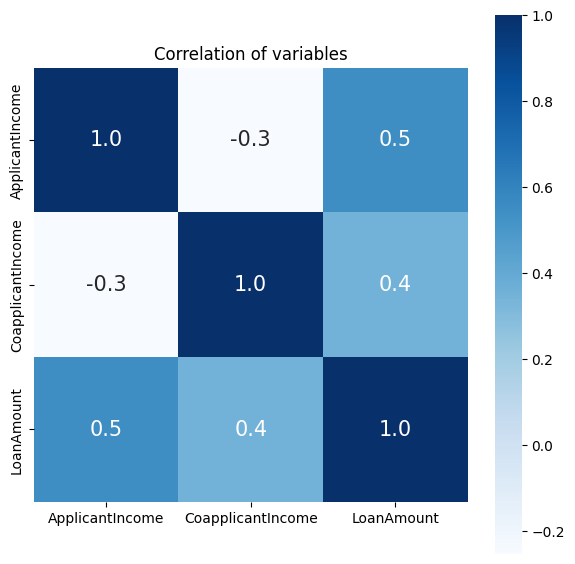

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Correlation of variables')
corr = df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True, cmap='Blues', cbar=True, square= True, fmt='.1f', annot_kws={'size':15})

In [ ]:

import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
rfe = RFE(estimator=logreg_model, n_features_to_select=7)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)
print("Selected Features:", selected_features)

Selected Features: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Married',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [ ]:
df=df[selected_features]
df.shape

(136, 7)

In [ ]:
X = df
y = ddf
print(X.shape,y.shape)


(136, 7) (136,)


In [ ]:
XX=X
yy=y

In [ ]:
pip install imblearn

In [ ]:


from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X,y)

In [ ]:
print(X,y)

     ApplicantIncome  CoapplicantIncome  LoanAmount   Married  \
0           0.068115           0.000000    0.180873  0.000000   
1           0.069858           0.000000    0.174816  0.000000   
2           0.020845           0.065937    0.141459  0.000000   
3           0.057674           0.000000    0.155184  0.000000   
4           0.029853           0.080657    0.142715  1.000000   
..               ...                ...         ...       ...   
219         0.039692           0.045129    0.133131  1.000000   
220         0.066635           0.053035    0.217735  1.000000   
221         0.061075           0.037934    0.222341  0.155802   
222         0.092000           0.004746    0.200731  0.894374   
223         0.000095           0.042186    0.167605  1.000000   

     Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  
0                    0.0                      0.0                  1.0  
1                    0.0                      0.0                  1.0  


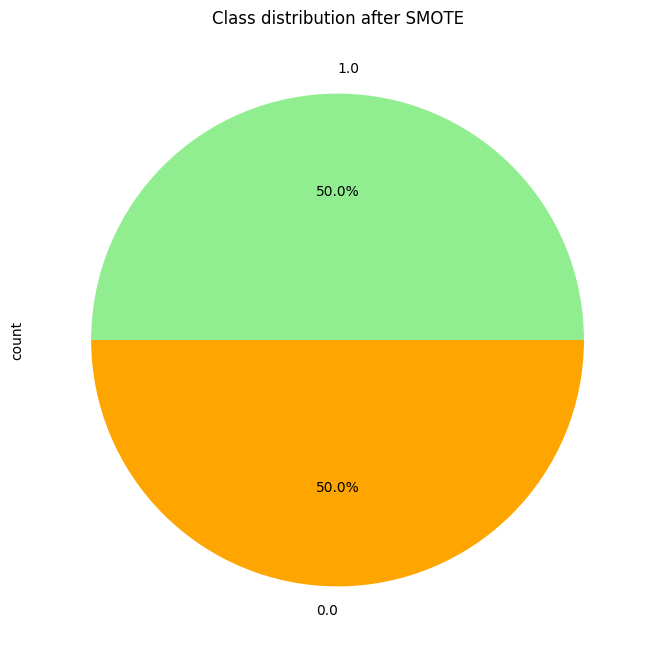

In [ ]:
plt.figure(figsize=(8, 8))
y.value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen','orange'])
plt.title('Class distribution after SMOTE')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (179, 7) (179,)
Test set: (45, 7) (45,)


In [ ]:
Training_Accuracy_L=[0]*6
Test_Accuracy_L=[0]*6
Sensitivity_L=[0]*6
Specificity_L=[0]*6
F1Score_L=[0]*6
Precision_L=[0]*6
Negative_Predictive_Value_L=[0]*6
False_Negative_Rate_L=[0]*6
False_Positive_Rate_L=[0]*6
False_Discovery_Rate_L=[0]*6
False_Omission_Rate_L=[0]*6
cv_accuracy_L=[0]*6

In [ ]:
import math


def rounder(n):
  try:
    return math.ceil(n * 1000) / 1000
  except:
    return n

def fun(model,name,num_folds,index):
  test_pred = model.predict(X_test)
  train_pred = model.predict(X_train)

  train_acc=rounder(accuracy_score(y_train,train_pred)*100)
  test_acc=rounder(accuracy_score(y_test,test_pred)*100)

  Training_Accuracy_L[index]=train_acc
  Test_Accuracy_L[index]=test_acc

  print("\nTraining Accuracy:", train_acc)
  print("\nTesting Accuracy:",test_acc)

  print(classification_report(y_test,test_pred))
  test_conf_matrix = confusion_matrix(y_test,test_pred)
  plt.figure(figsize=(4, 4))
  sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
  t=name+' Confusion Matrix - Test Set'
  plt.title(t)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  tn, fp,fn,tp = test_conf_matrix.ravel()

  Sensitivity=rounder((tp) / (tp + fn))
  Sensitivity_L[index]=Sensitivity

  Specificity=rounder((tn) / (tn + fp))
  Specificity_L[index]=Specificity

  F1Score=rounder( (2 * tp) / (2 * tp+ fp + fn))
  F1Score_L[index]=F1Score

  Precision=rounder((tp) / (tp +fp))
  Precision_L[index]=Precision

  Negative_Predictive_Value= rounder((tn) / (tn + fn))
  Negative_Predictive_Value_L[index]=Negative_Predictive_Value

  False_Negative_Rate=rounder((fn) / (fn + tp))
  False_Negative_Rate_L[index]=False_Negative_Rate

  False_Positive_Rate=rounder((fp) / (fp + tn))
  False_Positive_Rate_L[index]=False_Positive_Rate

  False_Discovery_Rate=rounder((fp) / (fp + tp))
  False_Discovery_Rate_L[index]=False_Discovery_Rate

  False_Omission_Rate=rounder((fn) / (fn+ tn))
  False_Omission_Rate_L[index]=False_Omission_Rate


  print('Sensitivity:', Sensitivity)
  print('Specificity:', Specificity)
  print('F1 Score:', F1Score)
  print('Precision:',Precision)
  print('Negative Predictive Value:', Negative_Predictive_Value)
  print('False Negative Rate:',False_Negative_Rate)
  print('False Positive Rate:',False_Positive_Rate)
  print('False Discovery Rate:',False_Discovery_Rate)
  print('False Omission Rate:', False_Omission_Rate)

  test_probabilities =model.predict_proba(X_test)[:, 1]
  auc_score = roc_auc_score(y_test,test_probabilities)

  fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label=''+name+'(AUC = {:.2f})'.format(auc_score))
  plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random Guess')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve - '+name)
  plt.legend()
  plt.show()

  kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
  print(f"\n{num_folds}-Fold Cross-Validation Scores:")
  print(cv_scores)

  print(f"\nCross-Validation Accuracy Score: {max(cv_scores) * 100:.2f}%")
  cv_accuracy_L[index]=max(cv_scores)*100



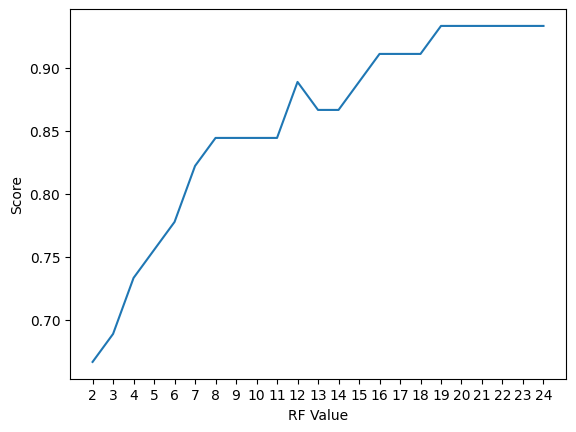

Random Forest Accuracy:  93.33%

Training Accuracy: 98.325

Testing Accuracy: 93.334
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        20
         1.0       0.89      1.00      0.94        25

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



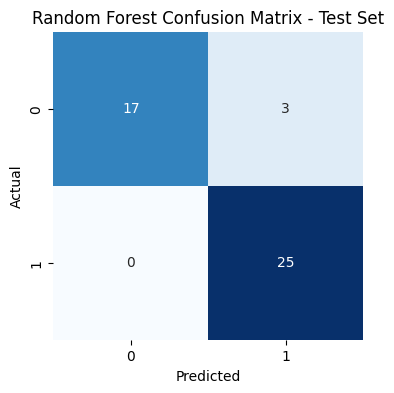

Sensitivity: 1.0
Specificity: 0.85
F1 Score: 0.944
Precision: 0.893
Negative Predictive Value: 1.0
False Negative Rate: 0.0
False Positive Rate: 0.15
False Discovery Rate: 0.108
False Omission Rate: 0.0


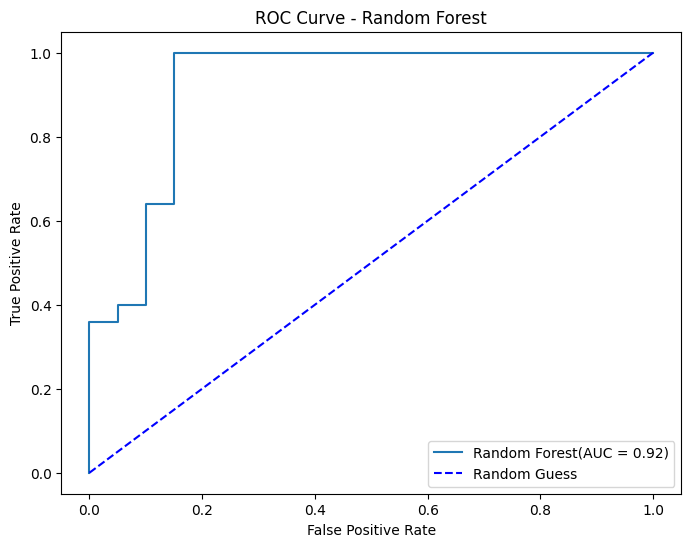


14-Fold Cross-Validation Scores:
[0.84615385 0.76923077 0.84615385 0.76923077 0.84615385 0.84615385
 0.76923077 0.84615385 0.92307692 1.         0.69230769 0.75
 0.66666667 0.66666667]

Cross-Validation Accuracy Score: 100.00%


In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))
fun(RFclassifier,'Random Forest',14,0)


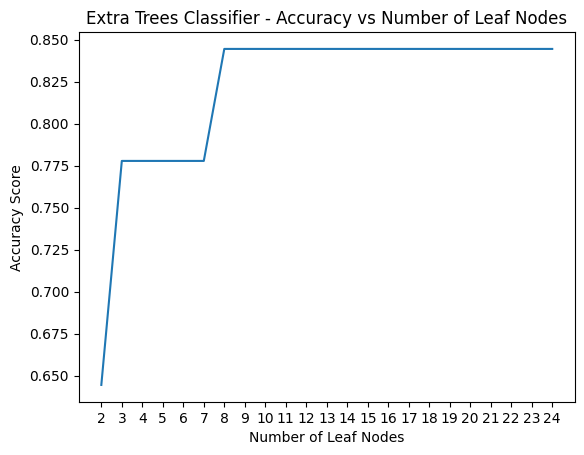

Extra Trees Classifier Accuracy: 84.44%

Training Accuracy: 88.827

Testing Accuracy: 84.445
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84        20
         1.0       0.91      0.80      0.85        25

    accuracy                           0.84        45
   macro avg       0.85      0.85      0.84        45
weighted avg       0.85      0.84      0.84        45



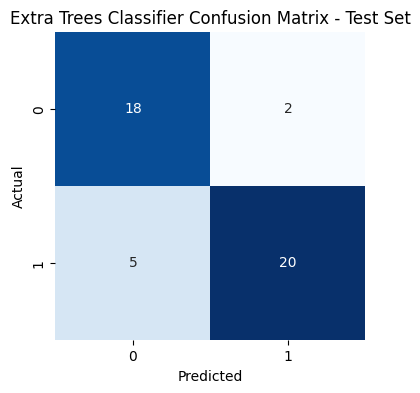

Sensitivity: 0.8
Specificity: 0.9
F1 Score: 0.852
Precision: 0.91
Negative Predictive Value: 0.783
False Negative Rate: 0.2
False Positive Rate: 0.1
False Discovery Rate: 0.091
False Omission Rate: 0.218


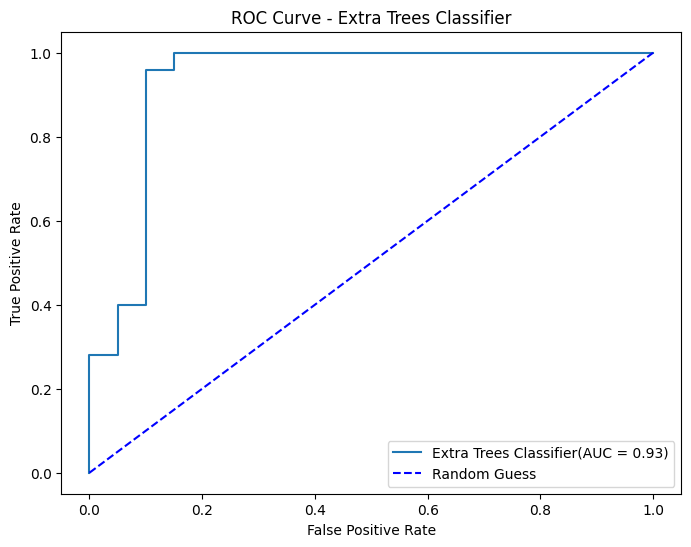


6-Fold Cross-Validation Scores:
[0.8        0.83333333 0.83333333 0.86666667 0.66666667 0.65517241]

Cross-Validation Accuracy Score: 86.67%


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
scoreListET=[]
for i in range(2, 25):
    ETclassifier = ExtraTreesClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    ETclassifier.fit(X_train, y_train)
    scoreListET.append(ETclassifier.score(X_test, y_test))

plt.plot(range(2, 25), scoreListET)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("Number of Leaf Nodes")
plt.ylabel("Accuracy Score")
plt.title("Extra Trees Classifier - Accuracy vs Number of Leaf Nodes")
plt.show()

ETAcc = max(scoreListET)
print("Extra Trees Classifier Accuracy: {:.2f}%".format(ETAcc * 100))
fun(ETclassifier,'Extra Trees Classifier',6,1)

LR accuracy: 75.56%


Training Accuracy: 66.481

Testing Accuracy: 75.556
              precision    recall  f1-score   support

         0.0       0.68      0.85      0.76        20
         1.0       0.85      0.68      0.76        25

    accuracy                           0.76        45
   macro avg       0.77      0.77      0.76        45
weighted avg       0.77      0.76      0.76        45



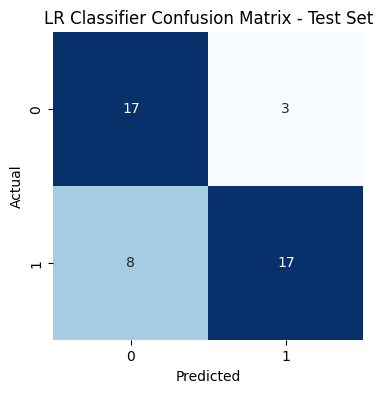

Sensitivity: 0.68
Specificity: 0.85
F1 Score: 0.756
Precision: 0.85
Negative Predictive Value: 0.68
False Negative Rate: 0.32
False Positive Rate: 0.15
False Discovery Rate: 0.15
False Omission Rate: 0.32


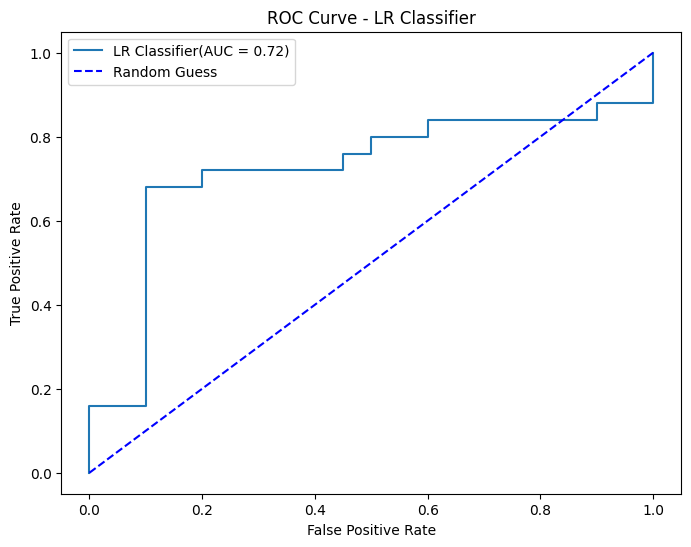


5-Fold Cross-Validation Scores:
[0.66666667 0.80555556 0.77777778 0.55555556 0.48571429]

Cross-Validation Accuracy Score: 80.56%


In [ ]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%\n'.format(LRAcc*100))
fun(LRclassifier,'LR Classifier',5,2)

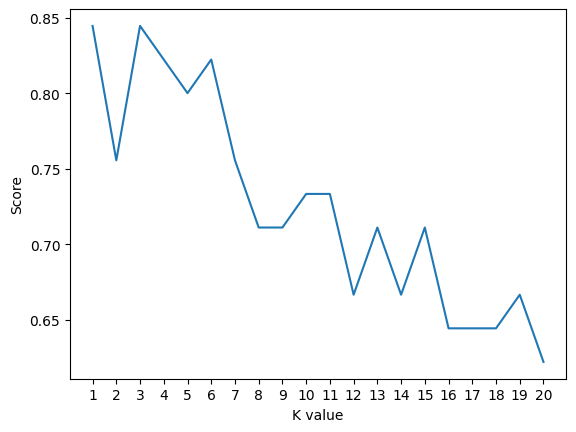

KNN best accuracy: 84.44%

Training Accuracy: 69.274

Testing Accuracy: 62.223
              precision    recall  f1-score   support

         0.0       0.56      0.75      0.64        20
         1.0       0.72      0.52      0.60        25

    accuracy                           0.62        45
   macro avg       0.64      0.64      0.62        45
weighted avg       0.65      0.62      0.62        45



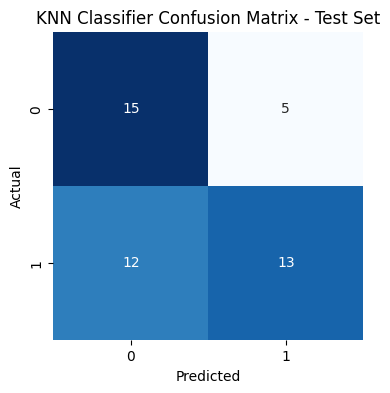

Sensitivity: 0.52
Specificity: 0.75
F1 Score: 0.605
Precision: 0.723
Negative Predictive Value: 0.556
False Negative Rate: 0.48
False Positive Rate: 0.25
False Discovery Rate: 0.278
False Omission Rate: 0.445


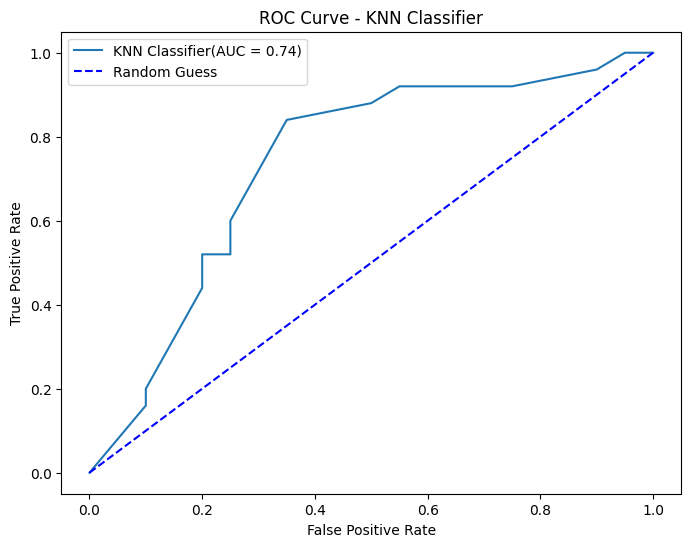


8-Fold Cross-Validation Scores:
[0.60869565 0.7826087  0.69565217 0.81818182 0.72727273 0.68181818
 0.36363636 0.59090909]

Cross-Validation Accuracy Score: 81.82%


In [ ]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))
fun(KNclassifier,'KNN Classifier',8,3)

In [ ]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):


    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.84444444, 0.75555556, 0.84444444, 0.82222222, 0.8       ,
       0.82222222, 0.75555556, 0.71111111, 0.71111111])

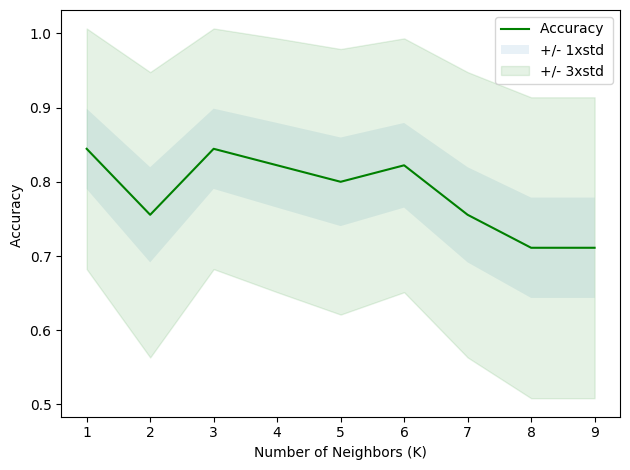

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "which was K=", mean_acc.argmax()+1)

The best accuracy was with 0.8444444444444444 which was K= 1


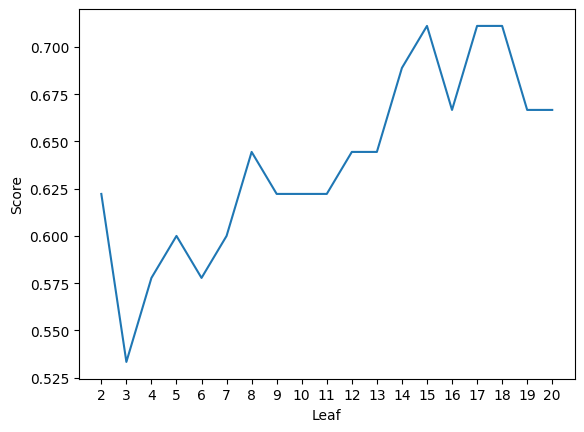

Decision Tree Accuracy: 71.11%

Training Accuracy: 91.062

Testing Accuracy: 66.667
              precision    recall  f1-score   support

         0.0       0.63      0.60      0.62        20
         1.0       0.69      0.72      0.71        25

    accuracy                           0.67        45
   macro avg       0.66      0.66      0.66        45
weighted avg       0.67      0.67      0.67        45



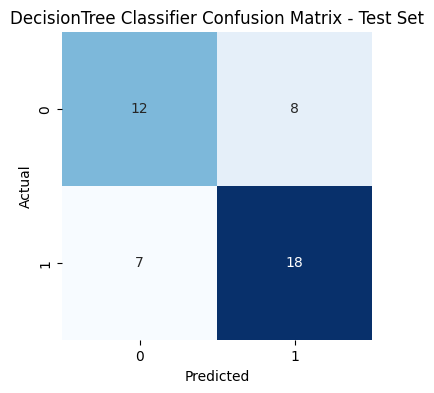

Sensitivity: 0.72
Specificity: 0.6
F1 Score: 0.706
Precision: 0.693
Negative Predictive Value: 0.632
False Negative Rate: 0.28
False Positive Rate: 0.4
False Discovery Rate: 0.308
False Omission Rate: 0.369


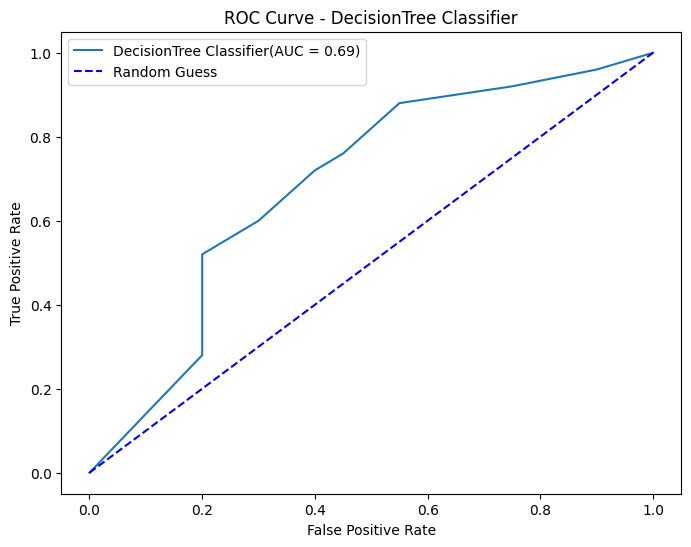


6-Fold Cross-Validation Scores:
[0.7        0.76666667 0.63333333 0.8        0.73333333 0.72413793]

Cross-Validation Accuracy Score: 80.00%


In [ ]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))
fun(DTclassifier,'DecisionTree Classifier',6,4)

Gradient Boosting accuracy: 84.44%

Training Accuracy: 100.0

Testing Accuracy: 84.445
              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81        20
         1.0       0.82      0.92      0.87        25

    accuracy                           0.84        45
   macro avg       0.85      0.83      0.84        45
weighted avg       0.85      0.84      0.84        45



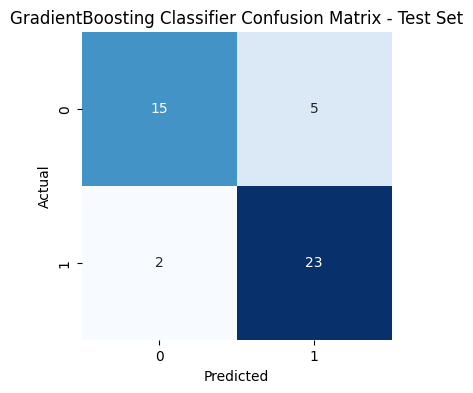

Sensitivity: 0.92
Specificity: 0.75
F1 Score: 0.868
Precision: 0.822
Negative Predictive Value: 0.883
False Negative Rate: 0.08
False Positive Rate: 0.25
False Discovery Rate: 0.179
False Omission Rate: 0.118


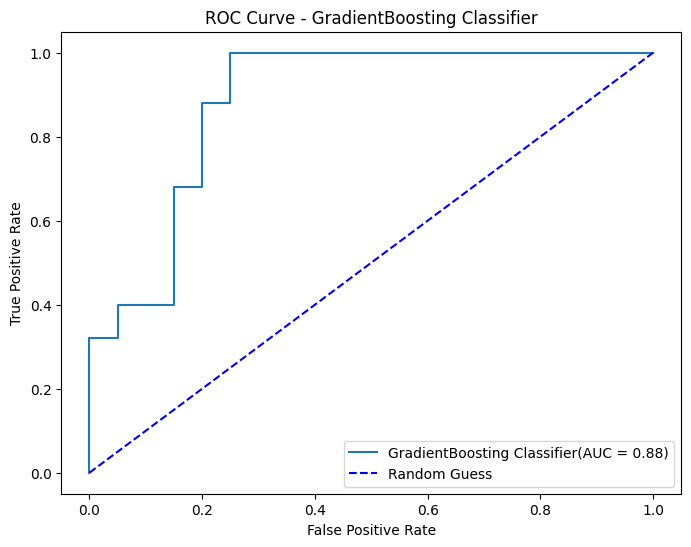


12-Fold Cross-Validation Scores:
[0.86666667 0.8        0.86666667 0.8        0.93333333 0.6
 0.86666667 0.8        0.86666667 0.66666667 0.73333333 0.71428571]

Cross-Validation Accuracy Score: 93.33%


In [ ]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))
fun(GBclassifier,'GradientBoosting Classifier', 12,5)

In [ ]:
compare = pd.DataFrame({'Model': ['Random Forest','Extra Trees Classifier','Logistic Regression', 'K Neighbors', 'Decision Tree',
                                   'Gradient Boost'],
                        'Accuracy': [RFAcc*100,ETAcc*100,LRAcc*100, KNAcc*100,
                                     DTAcc*100,  GBAcc*100],
                        'Training Accuracy':Training_Accuracy_L,
                        'Test Accuracy':Test_Accuracy_L,
                        'Sensitivity':Sensitivity_L,
                        'Specificity':Specificity_L,
                        'F1 Score':F1Score_L,
                        'Precision':Precision_L,
                        'Negative Predictive Value':Negative_Predictive_Value_L,
                        'False Negative Rate':False_Negative_Rate_L,
                        'False Positive Rate':False_Positive_Rate_L,
                        'False Discovery Rate':False_Discovery_Rate_L,
                        'False Omission Rate':False_Omission_Rate_L,
                        'cv-accuracy score':cv_accuracy_L,
                        })
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Training Accuracy,Test Accuracy,Sensitivity,Specificity,F1 Score,Precision,Negative Predictive Value,False Negative Rate,False Positive Rate,False Discovery Rate,False Omission Rate,cv-accuracy score
0,Random Forest,93.333333,98.325,93.334,1.00,0.85,0.944,0.893,1.000,0.00,0.15,0.108,0.000,100.000000
1,Extra Trees Classifier,84.444444,88.827,84.445,0.80,0.90,0.852,0.910,0.783,0.20,0.10,0.091,0.218,86.666667
3,K Neighbors,84.444444,69.274,62.223,0.52,0.75,0.605,0.723,0.556,0.48,0.25,0.278,0.445,81.818182
5,Gradient Boost,84.444444,100.000,84.445,0.92,0.75,0.868,0.822,0.883,0.08,0.25,0.179,0.118,93.333333
2,Logistic Regression,75.555556,66.481,75.556,0.68,0.85,0.756,0.850,0.680,0.32,0.15,0.150,0.320,80.555556
4,Decision Tree,71.111111,91.062,66.667,0.72,0.60,0.706,0.693,0.632,0.28,0.40,0.308,0.369,80.000000


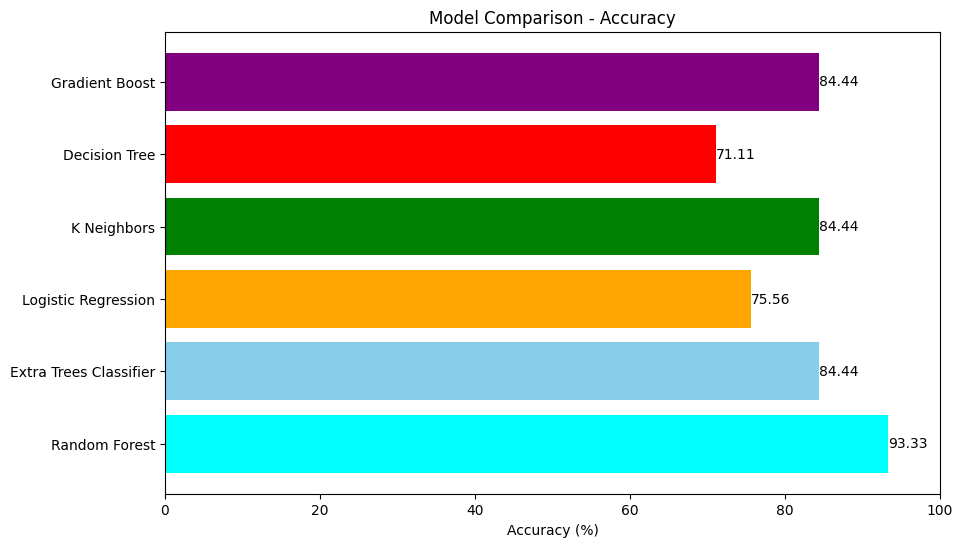

In [ ]:
colors = ['aqua','skyblue', 'orange', 'green', 'red', 'purple', 'pink']
plt.figure(figsize=(10, 6))
plt.barh(compare['Model'], compare['Accuracy'], color=colors)
plt.xlabel('Accuracy (%)')
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 100)
for index, value in enumerate(compare['Accuracy']):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10)

plt.show()

In [ ]:
def rounder(n):
    try:
        return math.ceil(n * 1000) / 1000
    except:
        return n

def fun_dense(model, name, num_folds, index):
    # Predict probabilities
    test_pred_prob = model.predict(X_test)
    train_pred_prob = model.predict(X_train)

    # Convert probabilities to class labels
    threshold = 0.5
    test_pred = (test_pred_prob > threshold).astype(int).reshape(-1)
    train_pred = (train_pred_prob > threshold).astype(int).reshape(-1)

    # Calculate accuracy
    train_acc = rounder(accuracy_score(y_train, train_pred) * 100)
    test_acc = rounder(accuracy_score(y_test, test_pred) * 100)

    Training_Accuracy_L[index] = train_acc
    Test_Accuracy_L[index] = test_acc

    # Print accuracies
    print("\nTraining Accuracy:", train_acc, "%")
    print("Testing Accuracy:", test_acc, "%\n")

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, test_pred))

    # Confusion Matrix
    test_conf_matrix = confusion_matrix(y_test, test_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
    t = name + ' Confusion Matrix - Test Set'
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    tn, fp, fn, tp = test_conf_matrix.ravel()

    # Calculate additional metrics
    Sensitivity = rounder((tp) / (tp + fn)) if (tp + fn) != 0 else 0
    Sensitivity_L[index] = Sensitivity

    Specificity = rounder((tn) / (tn + fp)) if (tn + fp) != 0 else 0
    Specificity_L[index] = Specificity

    F1Score = rounder((2 * tp) / (2 * tp + fp + fn)) if (2 * tp + fp + fn) != 0 else 0
    F1Score_L[index] = F1Score

    Precision = rounder((tp) / (tp + fp)) if (tp + fp) != 0 else 0
    Precision_L[index] = Precision

    Negative_Predictive_Value = rounder((tn) / (tn + fn)) if (tn + fn) != 0 else 0
    Negative_Predictive_Value_L[index] = Negative_Predictive_Value

    False_Negative_Rate = rounder((fn) / (fn + tp)) if (fn + tp) != 0 else 0
    False_Negative_Rate_L[index] = False_Negative_Rate

    False_Positive_Rate = rounder((fp) / (fp + tn)) if (fp + tn) != 0 else 0
    False_Positive_Rate_L[index] = False_Positive_Rate

    False_Discovery_Rate = rounder((fp) / (fp + tp)) if (fp + tp) != 0 else 0
    False_Discovery_Rate_L[index] = False_Discovery_Rate

    False_Omission_Rate = rounder((fn) / (fn + tn)) if (fn + tn) != 0 else 0
    False_Omission_Rate_L[index] = False_Omission_Rate

    # Print additional metrics
    print('Sensitivity (Recall):', Sensitivity)
    print('Specificity:', Specificity)
    print('F1 Score:', F1Score)
    print('Precision:', Precision)
    print('Negative Predictive Value:', Negative_Predictive_Value)
    print('False Negative Rate:', False_Negative_Rate)
    print('False Positive Rate:', False_Positive_Rate)
    print('False Discovery Rate:', False_Discovery_Rate)

    # ROC Curve
    # auc_score = roc_auc_score(y_test, test_pred_prob)
    # fpr, tpr, thresholds = roc_curve(y_test, test_pred_prob)
    # plt.figure(figsize=(8, 6))
    # plt.plot(fpr, tpr, label=''+name+' (AUC = {:.2f})'.format(auc_score))
    # plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('ROC Curve - '+name)
    # plt.legend()
    # plt.show()

    # # Cross-Validation using scikeras' KerasClassifier
    # keras_classifier = KerasClassifier(model=create_dense_model, epochs=50, batch_size=32, verbose=0)
    # kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # # Store scores for each epoch
    # epoch_scores = []

    # for epoch in range(1, 51):  # Iterate over each epoch from 1 to 50
    #     keras_classifier = KerasClassifier(model=create_dense_model, epochs=epoch, batch_size=32, verbose=0)
    #     cv_scores = cross_val_score(keras_classifier, X_train, y_train, cv=kf, scoring='accuracy')
    #     epoch_scores.append(np.mean(cv_scores))  # Store the mean score for each epoch

    # # Find the epoch with the best score
    # best_epoch = np.argmax(epoch_scores) + 1  # Add 1 since epochs start at 1
    # best_score = epoch_scores[best_epoch - 1]

    # print(f"\n{num_folds}-Fold Cross-Validation Scores:")
    # print(f"Scores for each epoch: {epoch_scores}")

    # print(f"\nBest Epoch: {best_epoch} with Cross-Validation Accuracy Score: {best_score * 100:.2f}%")
    # cv_accuracy_L[index] = best_score * 100

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6354 - loss: 0.6832 - val_accuracy: 0.5833 - val_loss: 0.6860
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6899 - loss: 0.6675 - val_accuracy: 0.5833 - val_loss: 0.6814
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6213 - loss: 0.6637 - val_accuracy: 0.5833 - val_loss: 0.6793
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6761 - loss: 0.6439 - val_accuracy: 0.5833 - val_loss: 0.6797
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7303 - loss: 0.6227 - val_accuracy: 0.5833 - val_loss: 0.6803
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7030 - loss: 0.6311 - val_accuracy: 0.5833 - val_loss: 0.6826
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6686 - loss: 0.6126 - val_accuracy: 0.5833 - val_loss: 0.6854
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6414 - loss: 0.6347 - val_accuracy: 0.5833 - val_loss:

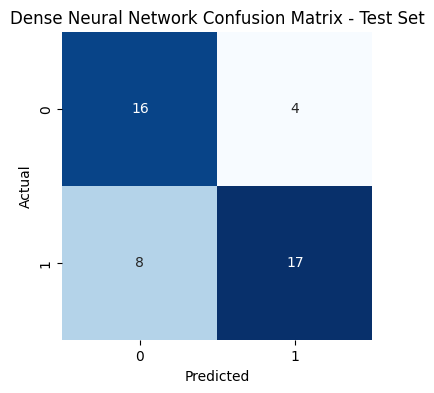

Sensitivity (Recall): 0.68
Specificity: 0.8
F1 Score: 0.74
Precision: 0.81
Negative Predictive Value: 0.667
False Negative Rate: 0.32
False Positive Rate: 0.2
False Discovery Rate: 0.191


In [ ]:
!pip install scikeras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten # Import Flatten
from scikeras.wrappers import KerasClassifier  # Make sure to import after installing

# Define the create_dense_model function
def create_dense_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Specify input shape with Input layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the Dense model
dense_model = create_dense_model()

# Display the model architecture
dense_model.summary()

# Train the Dense model
history_dense = dense_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate the Dense model using the 'fun_dense' function
fun_dense(dense_model, 'Dense Neural Network', 6, 2)

Original shape of X_train: (179, 7)
Number of samples: 179
Number of features: 7
Reshaped shape of X_train: (179, 1, 7)
Reshaped shape of X_test: (45, 1, 7)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 1, 128)              │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,105 (465.25 KB)

 Trainable params: 119,105 (465.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.5201 - loss: 0.6931 - val_accuracy: 0.4722 - val_loss: 0.6930
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5080 - loss: 0.6917 - val_accuracy: 0.4444 - val_loss: 0.6924
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6459 - loss: 0.6905 - val_accuracy: 0.5833 - val_loss: 0.6917
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6993 - loss: 0.6895 - val_accuracy: 0.5556 - val_loss: 0.6910
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6364 - loss: 0.6877 - val_accuracy: 0.5556 - val_loss: 0.6903
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6246 - loss: 0.6870 - val_accuracy: 0.5556 - val_loss: 0.6895
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6152 - loss: 0.6844 - val_accuracy: 0.5556 - val_loss: 0.6886
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6165 - loss: 0.6808 - val_accuracy: 0.5556 - val_loss

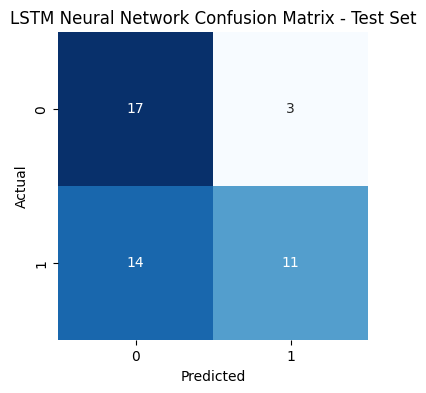

Sensitivity (Recall): 0.44
Specificity: 0.85
F1 Score: 0.565
Precision: 0.786
Negative Predictive Value: 0.549
False Negative Rate: 0.56
False Positive Rate: 0.15
False Discovery Rate: 0.215


In [ ]:
# Convert X_train to a NumPy array if it is a DataFrame
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()

# Print original shape
print("Original shape of X_train:", X_train.shape)

# Determine the number of features
#num_features = X_train.shape[1]
num_features = 7 #Manually set this to 7

# Print checks
print("Number of samples:", X_train.shape[0])
print("Number of features:", num_features)

# Reshape X_train to 3D (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, num_features))  # timesteps = 1

# Check the shape after reshaping
print("Reshaped shape of X_train:", X_train.shape)

# If you have a test set, do the same for X_test
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()

X_test = X_test.reshape((X_test.shape[0], 1, num_features))

# Check the shape after reshaping
print("Reshaped shape of X_test:", X_test.shape)

# Define the create_lstm_model function
def create_lstm_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Specify input shape for LSTM (timesteps, features)
    model.add(LSTM(128, return_sequences=True))  # LSTM layer with 128 units, return sequences
    model.add(Dropout(0.2))
    model.add(LSTM(64))  # LSTM layer with 64 units
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Instantiate the LSTM model
lstm_model = create_lstm_model()

# Display the model architecture
lstm_model.summary()

# Train the LSTM model
history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Ensure fun_dense function can process the LSTM model correctly

# Evaluate the LSTM model using the 'fun_dense' function
fun_dense(lstm_model, 'LSTM Neural Network', 6, 2)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


voting_clf = VotingClassifier(estimators=[('randf', RFclassifier), ('extra', ETclassifier), ('pgb', GBclassifier)], voting='hard')

voting_clf.fit(X_train, y_train)

ensemble_prediction = voting_clf.predict(X_test)

ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)
print("Accuracy - Voting Ensemble:", ensemble_accuracy*100)
num_folds=13
kf = KFold(n_splits=num_folds, shuffle=True,random_state=42)
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=kf, scoring='accuracy')
print(f"\n{num_folds}-Fold Cross-Validation Scores:")
print(cv_scores)

print(f"\nCross-Validation Accuracy Score: {max(cv_scores) * 100:.2f}%")
cv_accuracy_L.append(max(cv_scores)*100)

Accuracy - Voting Ensemble: 93.33333333333333

13-Fold Cross-Validation Scores:
[0.92857143 0.78571429 0.85714286 0.85714286 0.78571429 0.78571429
 0.85714286 0.85714286 0.92857143 0.85714286 0.69230769 0.69230769
 0.69230769]

Cross-Validation Accuracy Score: 92.86%


In [ ]:
import joblib
joblib.dump(voting_clf, "mymodel_ensemble.pkl")

['mymodel_ensemble.pkl']